In [1]:
# Import the required libraries

# get stock data 
import yfinance as yf
# vectorizing outputs
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Get the data using the yahoo finance API
tickers = ['SPY', 'AAPL']
data = yf.download(tickers)

[*********************100%***********************]  2 of 2 completed


In [3]:
closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

In [4]:
# Create a function for the Sharpe Ratio
# The function takes a series of daily returns and subtracts an adjustment factor. 
# divide the mean return by the standard deviation of return. 
# Since the function accepts daily returns, annualize it by multiplying by the square root 
# of the number of trading days in the year.

def sharpe_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sharpe ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sharpe_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Sharpe_ratio for more details.
    """
    returns_risk_adj = returns - adjustment_factor
    return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

In [5]:
# Compute the Sharpe Ratio for SPY and AAPL.

# sharpe ratio for SPY
print('SPY Sharpe Ratio:')
sharpe_ratio(spy_returns)
        

SPY Sharpe Ratio:


0.5802466600486759

In [6]:
# sharpe ratio for AAPL
print('AAPL Sharpe Ratio:')
sharpe_ratio(aapl_returns)

AAPL Sharpe Ratio:


0.6133408623764198

The Sharpe ratio for AAPL is higher than for SPY. 
That means you got more return for every unit of risk and might be considered "better."

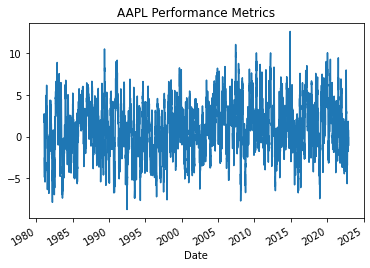

In [7]:
# View performance metrics
aapl_returns.rolling(30).apply(sharpe_ratio).plot(title = 'AAPL Performance Metrics');

# Save the figure.
plt.savefig(f"./Images/aaplReturns.jpg")

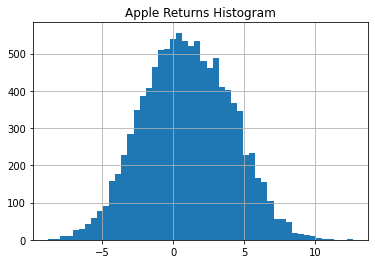

In [8]:
# Use a histogram to visualize the distribution of rolling Sharpe ratios.
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50);
plt.title('Apple Returns Histogram')
# Save the figure.
plt.savefig(f"./Images/aaplReturnsHistogram.jpg")

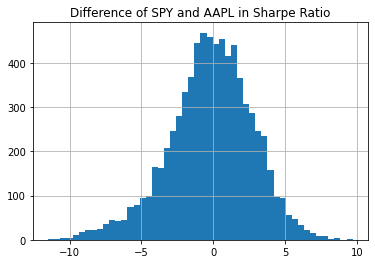

In [9]:
# Subtract the SPY Sharpe ratio from the AAPL Sharpe ratio and plot the result as a histogram.

(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins=50);
plt.title('Difference of SPY and AAPL in Sharpe Ratio')
# Save the figure.
plt.savefig(f"./Images/difference_in_sharpe_ratio.jpg")

AAPL does not consistently beat SPY over every 30-day period. However, by the analysis above, you’re safe to conclude based on risk-adjusted returns, it was a better investment.